In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import autoreload  (for debugging external subroutines)
%load_ext autoreload
%autoreload 2

# subroutines needed, we also need kepcart.py
from orbsubs import *  
from outils import *
from scipy.signal import savgol_filter    

plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Binary simulation output plotting

In [42]:
# global information needed!
simdir = "../bin1/" # where simulation output files are found
froot = 'a1'  # pure tidal evolution
   
m1 = 1.0;  # masses of the two bodies!  Globals!
m2 = 0.1;  
GM = m1+m2 # G=1


In [92]:
# plot some stuff
def mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,froot,ofilename):
    nvpanels = 4
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(5,6), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.12, right=0.99, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    il = 0;   # top
    
    smax = np.amax([np.amax(om1),np.amax(om2)])
    smin = np.amin([np.amin(om1),np.amin(om2)])
    axarr[il].set_ylim(smin,smax)
    axarr[il].plot(tarr,om1,'.',color='black',\
                   ms=2,label='prim')
    axarr[il].plot(tarr,om2,'.',color='blue',\
                   ms=2,label='sec')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 11, 2, mode='nearest')
    axarr[il].plot(tarr,mm_smo*1,':',color='brown',lw=1,alpha=0.5)
    axarr[il].plot(tarr,mm_smo*2,':',color='brown',lw=1,alpha=0.5) 
    axarr[il].plot(tarr,mm_smo*3,':',color='brown',lw=1,alpha=0.5) 
    axarr[il].set_ylabel('spin')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    il = 1;
    axarr[il].plot(tarr,obliquity_deg1,'.',color='red',\
                   ms=2,label='prim')
    axarr[il].plot(tarr,obliquity_deg2,'.',color='darkorange',\
                   ms=2,label='sec')
    axarr[il].set_ylabel('obliquity (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    il = 2;
    axarr[il].plot(tarr,aaarr,'.',color='green',ms=2)
    axarr[il].set_ylabel('semi-major')
    il = 3;
    axarr[il].plot(tarr,eearr,'.',color='cyan',ms=2)
    axarr[il].set_ylabel('eccentricity')
    il = nvpanels-1;
    axarr[il].set_xlabel('time')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

../bin1/a1_ext_1.txt
../bin1/a1_ext_2.txt


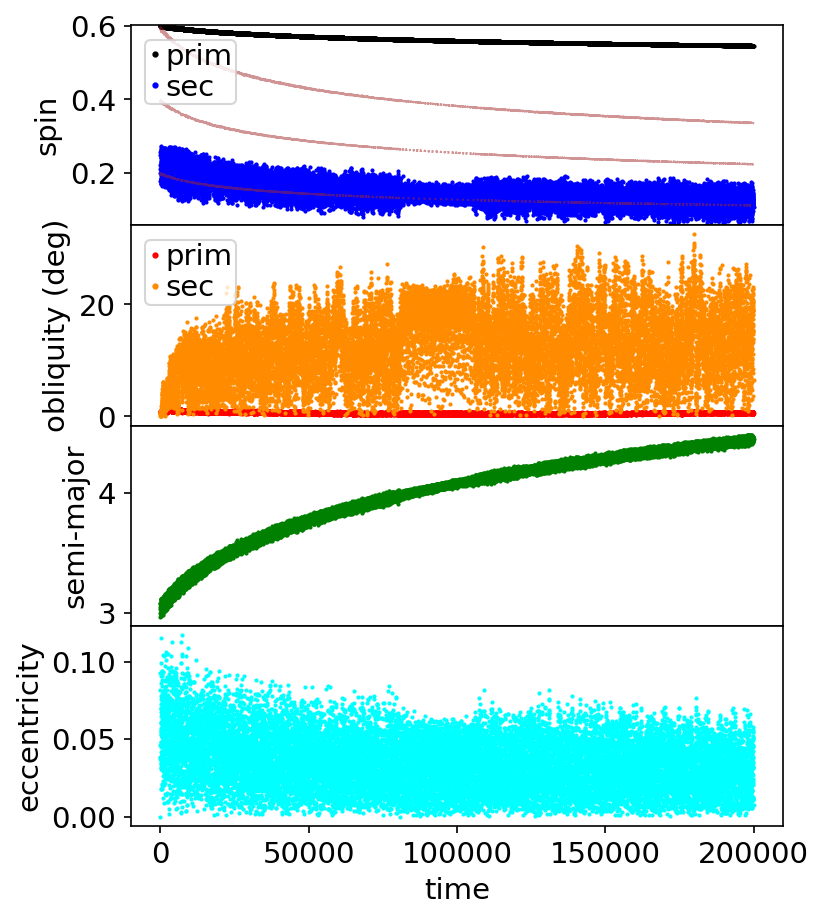

In [95]:
# read in orbital elements, spins for both resolved bodies
froot = 'a1'
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,froot,ofilename)

../bin1/b1_ext_1.txt
../bin1/b1_ext_2.txt


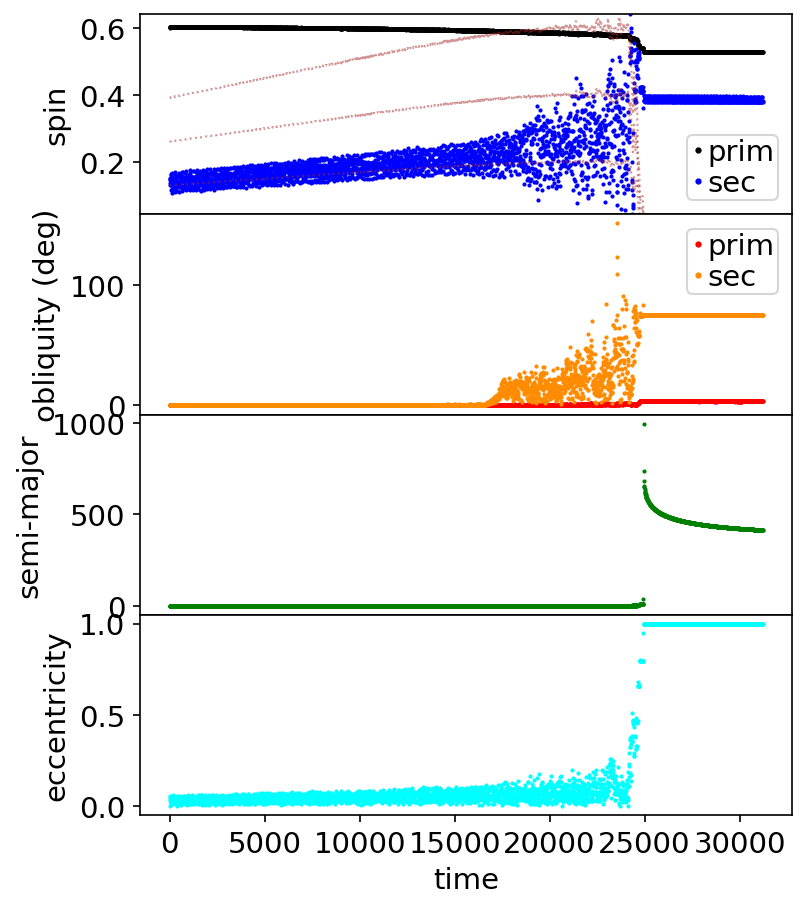

In [96]:
froot = 'b1'  # pure tidal evolution
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion = read_two_bodies(simdir,froot,GM)

# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,froot,ofilename)